# Regularized Linear Regression

In this notebook we use a regularized version of the linear regression model on a non-linear representation of our input space. If that sounds a bit confusing, please make sure you have gone through `notebook_01`and `notebook_02`. Here we only share the following key insights:
- To make a non-linear regression model we just use a non-linear funtion to transform our input $\mathbf{x}$ into $\phi({x})$. In the previous notebook we used a polynomial function.
- If you use non-linear models your model has higher capacity and may overfit your training data.
- When you are overfitting the weights of your model get bigger.

## Setup

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import lib, utils
%load_ext autoreload
%autoreload 2

In [4]:
def polynomial_features(X, degree=2):
    X_ = preprocessing.PolynomialFeatures(
            degree=degree, include_bias=False).fit_transform(X.copy())
    return X_

In [5]:
data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
X, y = data[:, :1], data[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

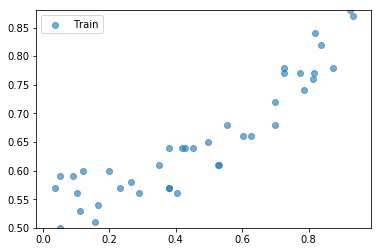

In [6]:
utils.make_plot(X_train, y_train)

## Overfitted model

Let us start with what finished in the last notebook: a polynomial model that clearly overfitted the training set

In [ ]:
X_train_poly = polynomial_features(X_train, degree=10)
X_test_poly = polynomial_features(X_test, degree=10)

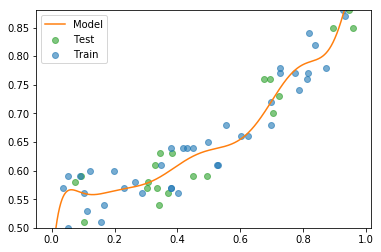

Mean Squared Error on train set: 0.000863
Mean Squared Error on test set: 0.001396
Norm of the weights: 131889.469537
Variance of the weights: 1581348379.504470


In [8]:
overfitted_model = lib.LinearRegression()
overfitted_model.fit(X_train_poly, y_train, method='normal equations')
utils.make_plot(X_train_poly, y_train, X_test_poly, y_test, overfitted_model, feature_extractor=lambda x: polynomial_features(x, degree=10))
y_pred = overfitted_model.predict(X_train_poly)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = overfitted_model.predict(X_test_poly)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(overfitted_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(overfitted_model.coef)))

In [36]:
overfitted_model.coef

array([ 4.27680865e-01,  6.91288662e+00, -1.33327774e+02,  1.30806519e+03,
       -7.44192920e+03,  2.61901270e+04, -5.84898789e+04,  8.27485625e+04,
       -7.16629375e+04,  3.45988438e+04, -7.12398242e+03])

## Regularized model

Now we make use of our implementation of the regularized linear regression. If we did it correctly we can expect:
- Smaller value of the weights' norm.
- Less *unnatural* curves in the plot of our model.
- Smaller difference between the errors of the train and test set.

Let us define what amount of regularization we need.

In [29]:
reg = 5000000000

[0.5485882  0.54858834 0.54858849 ... 0.64330331 0.64329432 0.64328533]


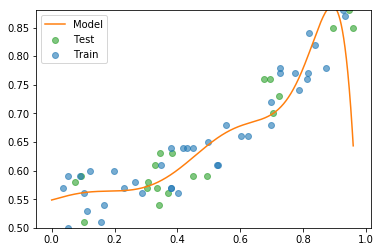

Mean Squared Error on train set: 0.001370
Mean Squared Error on test set: 0.004216
Norm of the weights: 134.874657
Variance of the weights: 1653.743016


In [42]:
ridge_model = lib.RidgeRegression(reg=reg)
ridge_model.fit(X_train_poly, y_train, method='normal equations')
utils.make_plot(X_train_poly, y_train, X_test_poly, y_test, ridge_model, feature_extractor=lambda x: polynomial_features(x, degree=10))
y_pred = ridge_model.predict(X_train_poly)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = ridge_model.predict(X_test_poly)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(ridge_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(ridge_model.coef)))

We did it! Let us test it now with our implementation of the grandient descent method

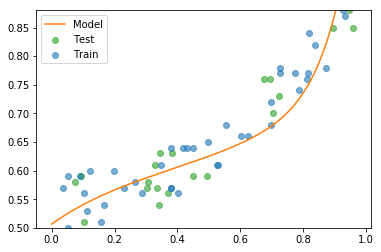

Mean Squared Error on train set: 0.001788
Mean Squared Error on test set: 0.004038
Norm of the weights: 1.585968
Variance of the weights: 0.216329


In [73]:
ridge_model = lib.RidgeRegression(reg=reg)
ridge_model.fit(X_train_poly, y_train, method='gradient descent', num_iterations=700)
utils.make_plot(X_train_poly, y_train, X_test_poly, y_test, ridge_model, feature_extractor=lambda x: polynomial_features(x, degree=10))
y_pred = ridge_model.predict(X_train_poly)
mse = lib.mean_squared_error(y_train, y_pred)
print("Mean Squared Error on train set: {:4f}".format(mse))

y_pred = ridge_model.predict(X_test_poly)
mse = lib.mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: {:4f}".format(mse))

print("Norm of the weights: {:4f}".format(np.linalg.norm(ridge_model.coef)))
print("Variance of the weights: {:4f}".format(np.var(ridge_model.coef)))

## Final notes

Consider the following:
- We did not say you would get better model performance! Consider the ridge regression as a tool that may or may not help you improve performance.
- Plot the learning curves to debug your implementation of gradient descent! While developing this notebook and implementation there was a bug that was resolved only until we ploted the learning curves :( 